In [3]:
import numpy as np

In [5]:
import july

In [6]:
from july.utils import date_range

In [7]:
dates = date_range('2024-01-01', '2024-12-31')

In [8]:
data = np.random.randint(0, 12, len(dates))

In [9]:
dates, data

([datetime.date(2024, 1, 1),
  datetime.date(2024, 1, 2),
  datetime.date(2024, 1, 3),
  datetime.date(2024, 1, 4),
  datetime.date(2024, 1, 5),
  datetime.date(2024, 1, 6),
  datetime.date(2024, 1, 7),
  datetime.date(2024, 1, 8),
  datetime.date(2024, 1, 9),
  datetime.date(2024, 1, 10),
  datetime.date(2024, 1, 11),
  datetime.date(2024, 1, 12),
  datetime.date(2024, 1, 13),
  datetime.date(2024, 1, 14),
  datetime.date(2024, 1, 15),
  datetime.date(2024, 1, 16),
  datetime.date(2024, 1, 17),
  datetime.date(2024, 1, 18),
  datetime.date(2024, 1, 19),
  datetime.date(2024, 1, 20),
  datetime.date(2024, 1, 21),
  datetime.date(2024, 1, 22),
  datetime.date(2024, 1, 23),
  datetime.date(2024, 1, 24),
  datetime.date(2024, 1, 25),
  datetime.date(2024, 1, 26),
  datetime.date(2024, 1, 27),
  datetime.date(2024, 1, 28),
  datetime.date(2024, 1, 29),
  datetime.date(2024, 1, 30),
  datetime.date(2024, 1, 31),
  datetime.date(2024, 2, 1),
  datetime.date(2024, 2, 2),
  datetime.date(2024,

<Axes: title={'center': 'Random'}>

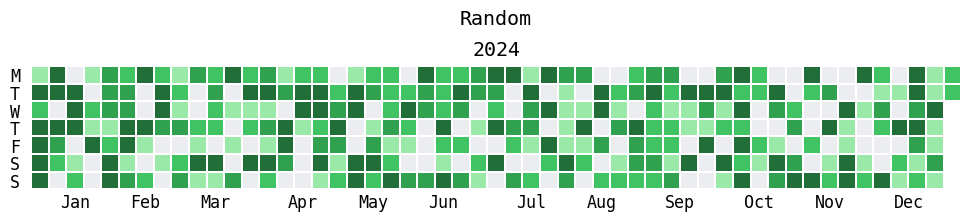

In [10]:
july.heatmap(dates, data, cmap='github', title='Random')

<Axes: title={'center': 'Random'}>

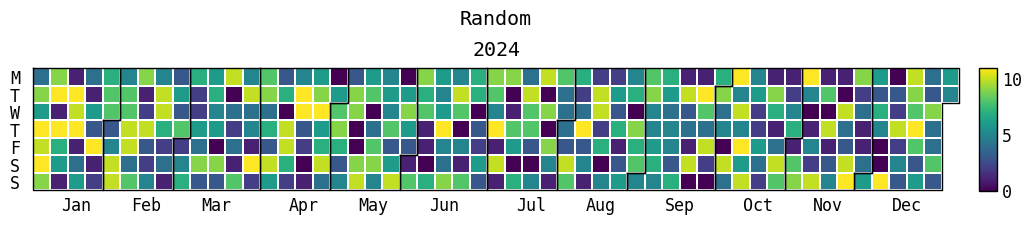

In [22]:
july.heatmap(dates, 
             data, 
             cmap='viridis',
            #  value_label=True,
             colorbar=True,
             month_grid=True,
             title='Random')

<Axes: title={'center': 'July'}>

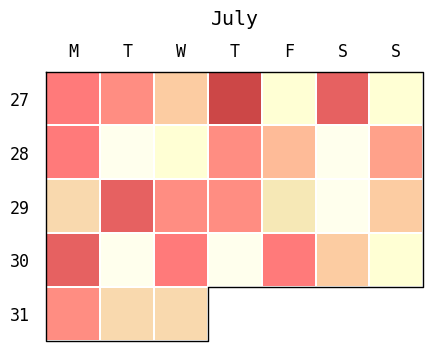

In [23]:
july.month_plot(
    dates,
    data,
    month=7
)

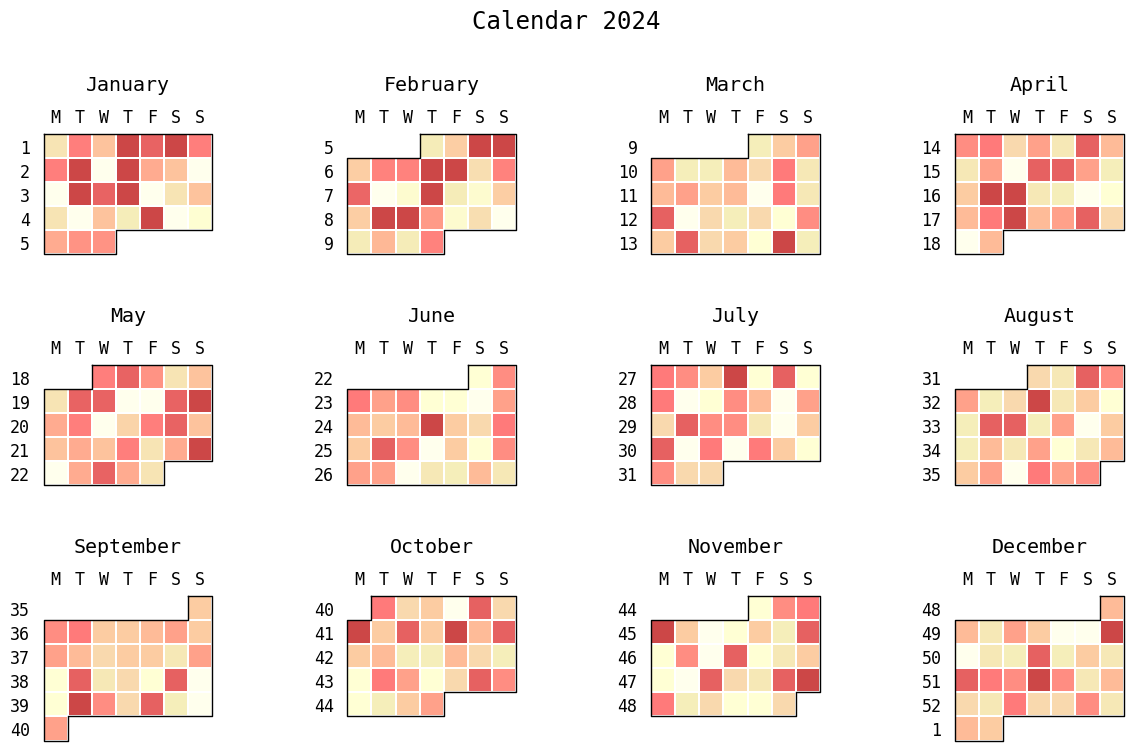

In [25]:
july.calendar_plot(
    dates,
    data
);

In [28]:
# test with indopremier example

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('2021.csv', delimiter=';')
df.head()

,Due,Transaction,Amount
0,12 Apr 2021,Deviden Tunai BMRI,"462,570"
1,28 Apr 2021,Deviden Tunai BBCA,"302,400"
2,28 Apr 2021,Deviden Tunai BBRI,"286,826"
3,29 Apr 2021,Deviden Tunai SIDO,"124,740"
4,30 Apr 2021,Deviden Tunai BBNI,"264,135"


In [29]:
from datetime import datetime

In [33]:
datetime.strptime(df['Due'][0], '%d %b %Y')

datetime.datetime(2021, 4, 12, 0, 0)

In [35]:
df['dt'] = df['Due'].apply(lambda x: datetime.strptime(x, '%d %b %Y'))

In [36]:
df.head()

,Due,Transaction,Amount,dt
0,12 Apr 2021,Deviden Tunai BMRI,"462,570",2021-04-12
1,28 Apr 2021,Deviden Tunai BBCA,"302,400",2021-04-28
2,28 Apr 2021,Deviden Tunai BBRI,"286,826",2021-04-28
3,29 Apr 2021,Deviden Tunai SIDO,"124,740",2021-04-29
4,30 Apr 2021,Deviden Tunai BBNI,"264,135",2021-04-30


In [42]:
df['Amount'].apply(lambda x: ''.join(x.split(','))).astype(float)

0     462570.0
1     302400.0
2     286826.0
3     124740.0
4     264135.0
5       4406.0
6    1694598.0
7     135200.0
8     666500.0
9     861800.0
Name: Amount, dtype: float64

In [43]:
df['value'] = df['Amount'].apply(lambda x: ''.join(x.split(','))).astype(float)

<Axes: >

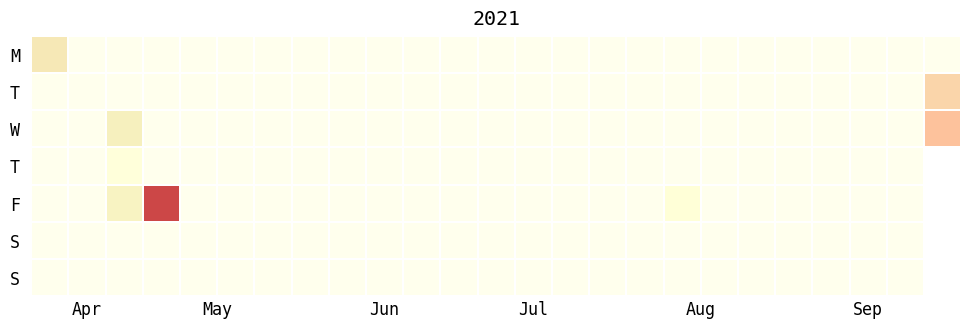

In [44]:
july.heatmap(df['dt'], df['value'], cmap='')

In [73]:
sb = pd.read_csv('stockbit.csv', delimiter=';')
sb.head()

,Date,Stock,Lot,Price,Total Dividend,Realized P&L
0,2024-07-12,IPCC,102,62.39,636378,636378
1,2024-07-12,BIRD,101,91.00,919100,919100
2,2024-07-09,BSSR,22,345.15,759330,759330
3,2024-07-05,ACES,55,33.50,184250,184250
4,2024-06-28,PGAS,161,148.30,2387728,2387728


In [74]:
sb.dtypes

Date               object
Stock              object
Lot                 int64
Price             float64
Total Dividend      int64
Realized P&L        int64
dtype: object

In [75]:
sb['dt'] = sb['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [76]:
sb['year'] = sb['dt'].apply(lambda x: x.year)

In [89]:
sb['count'] = 1

In [91]:
year = 2024

<Axes: >

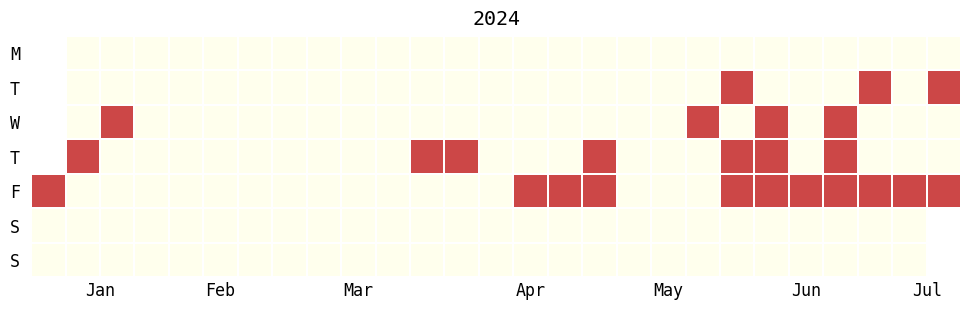

In [92]:
july.heatmap(sb[sb['year'] == year]['dt'], sb[sb['year'] == year]['count'])

In [79]:
val = 'Realized P&L'

<Axes: xlabel='Stock'>

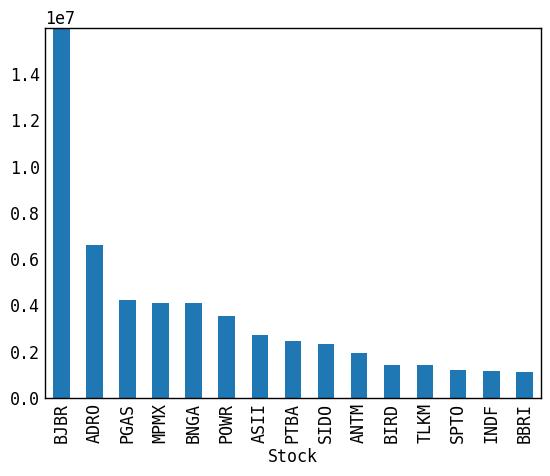

In [86]:
sb.groupby('Stock')[val].sum().sort_values(ascending=False)[:15].plot(kind='bar')

<Axes: ylabel='Realized P&L'>

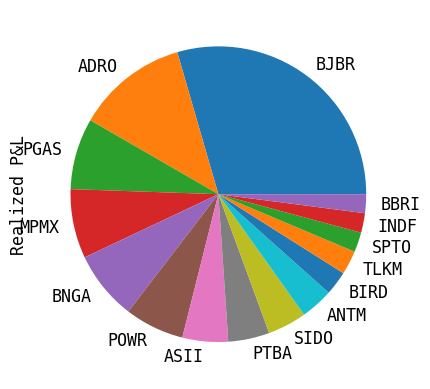

In [99]:
sb.groupby('Stock')[val].sum().sort_values(ascending=False)[:15].plot(kind='pie')

In [87]:
sb.groupby('Stock')[val].sum().sort_values(ascending=False)[:15]

Stock
BJBR    15987100
ADRO     6607290
PGAS     4221424
MPMX     4106000
BNGA     4100437
POWR     3519130
ASII     2708600
PTBA     2446271
SIDO     2310780
ANTM     1929532
BIRD     1423100
TLKM     1417128
SPTO     1175000
INDF     1156500
BBRI     1115866
Name: Realized P&L, dtype: int64

In [82]:
sb[sb['Stock'] == 'ADRO']

,Date,Stock,Lot,Price,Total Dividend,Realized P&L,dt,year
16,2024-06-05,ADRO,100,209.31,2093100,2093100,2024-06-05,2024
31,2024-01-12,ADRO,87,199.98,1739826,1739826,2024-01-12,2024
63,2023-06-06,ADRO,62,240.78,1492836,1492836,2023-06-06,2023
74,2023-01-13,ADRO,51,251.28,1281528,1281528,2023-01-13,2023


<Axes: xlabel='year'>

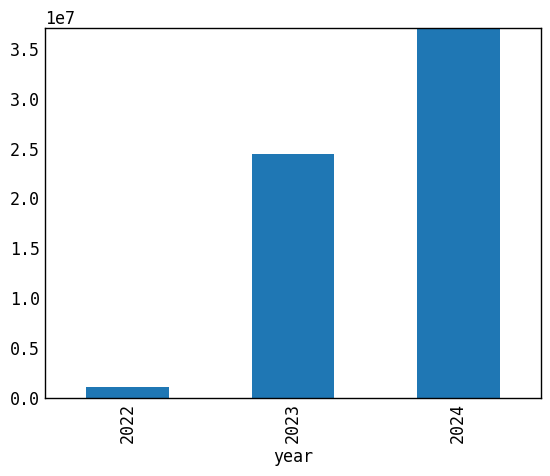

In [97]:
sb.groupby('year')[val].sum().sort_values(ascending=True).plot(kind='bar')